## A data approach to start-ups
***

<b><u>Idea:</u></b> Working in the world of M&A data, I am constantly exposed to start-ups and their evolution. What always surprises me is how some start-ups manage to get acquired at lofty valuations, sometimes in the billions of dollars, while other start-ups disappear entirely. Take Snapchat – now known as Snap Inc – for example. This messaging app has recently undergone the biggest tech IPO of the year at a valuation of USD 25bn. By contrast, Barnes & Noble, probably the most well-known bookstore chain in the US, with its 130-year history and close to 640 brick-and-mortar stores around the country, has a market cap of USD 760m, 30x times less than the expected market cap of Snapchat! Snapchat’s idea was original to some degree but not unique. There had been start-ups alongside Snapchat that had proposed similar ideas: Wickr, Hash, Ansa, Secret. Wickr still exists, but the other three have disappeared. The million-dollar question is: who could have predicted Snapchat's success early on and who could have predicted Secret's failure? This question has always been of huge interest to me, and I am hoping to answer it with this capstone project. <br></br><br></br>
<b><u>Target audience:</u></b> This project is intended for <b>anyone looking to start a business</b>. Which factors should they consider when looking for financing? How many funding rounds are optimal for success? Which investors have a track record of helping companies succeed? Most importantly, is it even possible to forecast success given some observable parameters at an early stage?<br></br>

At the same time, this is an important question for <b>investors</b> as well. The goal for any investor is to maximize returns, so the better they can predit success of an investment, they more successful they will be themselves. If only they had a tool to reveal all potential investments that are likely to succeed. 

<b><u>References:</u></b> This study question is interesting, but it is not new. Several studies have been done in the past assessing factors influencing start-up growth. Previous studies have focused on education vs. experience of entrepreneurs, management style, cash-burn-rate in the first year, and even the name of a start-up. Most of the studies are based on surveys or on data focusing on specific geographies. However, no expansive, <i>predictive</i> study using historical, comprehensive dataset is known to date. 

<b><u>Data:</u></b> The data for the project came from crunchbase, a data company: https://www.crunchbase.com/
Crunchbase data on start-ups is broken down into three separate datasets: <b>companies</b> (with specific information on companies), <b>acquisitions</b> (which includes information on acquisitions by start-ups and of start-ups), and <b>investments</b> (which focuses on VC funding rounds).

The three datasets used in the project were downloaded on <b>December 4th 2015</b> and were made available on github by a different user. 

Use of this data is governed by the [CrunchBase Terms of Service and Licensing Policy](https://about.crunchbase.com/docs/terms-of-service/). 
***

Let's start by loading different packages that will help us explore all three datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sb

### Data exploration

<b>Companies dataset </b>

Next, we will begin by exploring the first dataset, companies.csv, which is supposed to be an overview of available start-ups. 

In [2]:
companies = pd.DataFrame.from_csv('companies.csv', index_col = None)

In [3]:
print("There are {:2f}".format(len(companies)) + " start-ups with data on Crunchbase.")

There are 27327.000000 start-ups with data on Crunchbase.


In [4]:
companies[0:4]

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,id
0,/company/8868,8868,http://www.8868.cn,NaN,NaN,operating,NaN,NaN,unknown,NaN,1,NaN,NaN,NaN,NaN,12/1/2013,12/1/2013,NaN,1
1,/company/21e6,2.10E+07,NaN,NaN,5050000.0,operating,USA,CA,SF Bay,San Francisco,1,1/1/2013,2013-01,2013-Q1,2013.0,11/17/2013,11/17/2013,NaN,2
2,/company/club-domains,.Club Domains,http://dotclub.com,software,7000000.0,operating,USA,FL,Fort Lauderdale,Oakland Park,1,10/10/2011,2011-10,2011-Q4,2011.0,5/31/2013,5/31/2013,NaN,3
3,/company/fox-networks,.Fox Networks,http://www.dotfox.com,advertising,4912394.0,closed,ARG,NaN,Buenos Aires,Buenos Aires,1,NaN,NaN,NaN,NaN,1/16/2007,1/16/2007,7/1/2008,4


We can also look at one specific company on the list:

In [5]:
companies.loc[1]

permalink            /company/21e6
name                      2.10E+07
homepage_url                   NaN
category_code                  NaN
funding_total_usd         5.05e+06
status                   operating
country_code                   USA
state_code                      CA
region                      SF Bay
city                 San Francisco
funding_rounds                   1
founded_at                1/1/2013
founded_month             2013-01 
founded_quarter            2013-Q1
founded_year                  2013
first_funding_at        11/17/2013
last_funding_at         11/17/2013
last_milestone_at              NaN
id                               2
Name: 1, dtype: object

Even though it might seem that there is something wrong with the company name, the company's real name is in fact 21e6 -- it's a bitcoin startup. 

Another observation is that several fields for this company have missing information, and we will have to account for that in our future analysis.

Next, let's check the type of all columns in the dataset to make sure we can use them for our analysis going forward.

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27327 entries, 0 to 27326
Data columns (total 19 columns):
permalink            27327 non-null object
name                 27327 non-null object
homepage_url         25940 non-null object
category_code        26298 non-null object
funding_total_usd    24010 non-null float64
status               27327 non-null object
country_code         25504 non-null object
state_code           16872 non-null object
region               27327 non-null object
city                 24705 non-null object
funding_rounds       27327 non-null int64
founded_at           21441 non-null object
founded_month        21441 non-null object
founded_quarter      21441 non-null object
founded_year         21441 non-null float64
first_funding_at     27176 non-null object
last_funding_at      27176 non-null object
last_milestone_at    14604 non-null object
id                   27327 non-null int64
dtypes: float64(2), int64(2), object(15)
memory usage: 4.0+ MB


Almost all columns are of type object, including those columns containing dates (first_funding_at, last_funding_at, and last_milestone_at). Two columns are of type float (funding_total_usd and founded_year) and one column is of type int (funding_rounds).

Next, let's ask a few questions about the dataset to get to know that data better.

##### What is the distrubution of start-ups across the globe?

In [7]:
countries = companies.country_code.dropna()
from collections import Counter
countries_dict = Counter(countries)
sorted_countries = sorted(countries_dict.items(), key = lambda x: x[1], reverse = True)
sorted_countries[0:14]

[('USA', 17053),
 ('GBR', 1629),
 ('CAN', 852),
 ('DEU', 622),
 ('FRA', 589),
 ('IND', 505),
 ('ISR', 457),
 ('ESP', 309),
 ('CHN', 299),
 ('SWE', 227),
 ('ITA', 202),
 ('AUS', 201),
 ('IRL', 193),
 ('NLD', 181)]

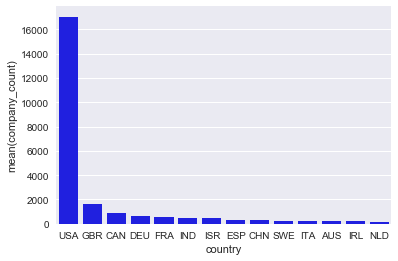

In [8]:
countries_df = pd.DataFrame(sorted_countries[0:14])
countries_df.columns = ['country', 'company_count']

%matplotlib inline

sb.barplot(x ='country', y ='company_count', color = 'blue', data = countries_df)


Looking at the chart, we can already tell that most start-ups are based in the US, with UK and Canada being distant second and third. While it is reasonable to suppose that US has the most start-ups, it might also indicate a selection bias due to available data on start-ups (presumably, it might be easier to come across start-up data in the US, or, alternatively, companies in the US might be more inclined to add their data to crunchbase).

That's one of the basic questions about the data. Now let's look further into questions that are more closely related to our research problem, which is centered around success and failure of start-ups.

##### How many companies are operating, were acquired, got listed, or had to close down?

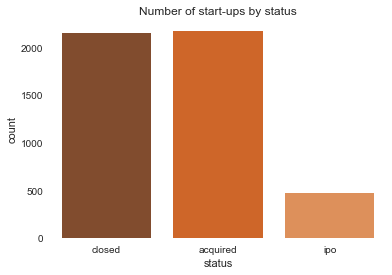

In [9]:
operating = companies[companies.status == 'operating'].permalink.count()
closed = companies[companies.status == 'closed'].permalink.count()
acquired = companies[companies.status == 'acquired'].permalink.count()
ipo = companies[companies.status == 'ipo'].permalink.count()
oper_closed_dict = {'operating': operating, 'closed': closed, 'acquired': acquired, 'ipo': ipo}
oper_closed_df = pd.DataFrame.from_dict(oper_closed_dict, orient = 'index')

oper_closed_df.reset_index(inplace = True)
oper_closed_df.columns = ['status', 'count']

fig, ax = plt.subplots()

sb.countplot(data = companies, x = companies.status[companies.status != 'operating'], hue_order = 'status', palette = 'Oranges_d')

ax.set_title('Number of start-ups by status')
ax.set_frame_on(False)
plt.savefig('Status.png', bbox_inches='tight')

Here are the more precise numbers:

In [10]:
oper_closed_df

,status,count
0,closed,2153
1,ipo,475
2,acquired,2176
3,operating,22523


Based on the data, we can see that less than 10% of companies are identified as closed in the database, while a similar number of start-ups have already been acquired.

It is those closed (unsuccessful) vs. acquired or listed (successful) companies that we will be particularly interested in later in our analysis.

##### Year founded and status

There might be a correlation between year founded and the status of a company, so let's visualize these two parameters. For example, companies founded during recession or right before recession might have a higher probability of closing down. Let's explore that.

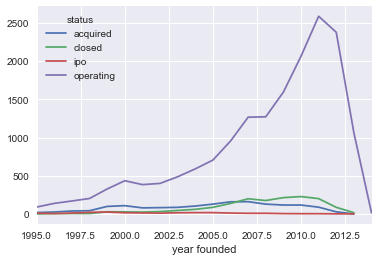

In [11]:
year_founded = companies['founded_year']
status = companies['status']
year_vs_status = {'year founded': year_founded, 'status': status}
year_vs_status_df = pd.DataFrame(year_vs_status)
new_dict = year_vs_status_df.groupby('status')['year founded'].value_counts()
new_df = pd.DataFrame.from_dict(new_dict)
new_df = new_df.unstack()
new_df = new_df.transpose()
new_df = new_df.reset_index()
new_df = new_df.drop('level_0',1)
new_df = new_df.tail(20)

# let's do a line graph of year_founded vs. status
sb.set_style("darkgrid")
new_df.plot(x = 'year founded')

if we exclude operating companies, most of which were founed after 2010, as expected:

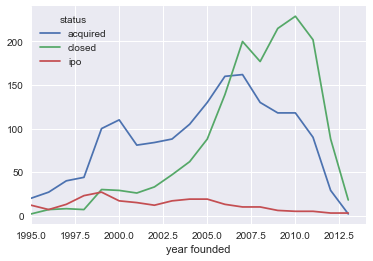

In [12]:
without_oper = new_df.drop('operating', 1)
sb.set_style("darkgrid")
without_oper.plot(x = 'year founded')

What is interesting in this chart is that a lot of companies that got listed were founded between 1995 and 2000, which is actually quite reasonable and might suggest that it takes some time for companies to mature enough to get listed.

Let's also visualize when all companies in the database got founded, regardless of the status. This will help us compare ipo'ed companies to the 'average' company, for example.

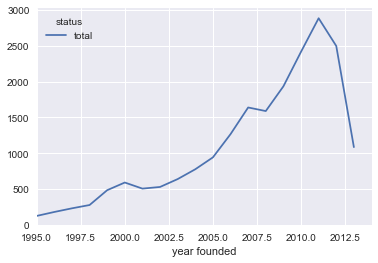

In [13]:
new_df['total'] = new_df['acquired'] + new_df['ipo'] + new_df['closed'] + new_df['operating']
only_total = new_df.drop(['acquired', 'closed', 'ipo', 'operating'], 1)
sb.set_style("darkgrid")
only_total.plot(x = 'year founded')

More and more start-ups seem to be founded each year, with a sharp increase between 2008 and 2011, the recession years, which is actually quite interesting.

##### Visualizing total funding vs. status (operating or closed) might also shed some light on our research question.

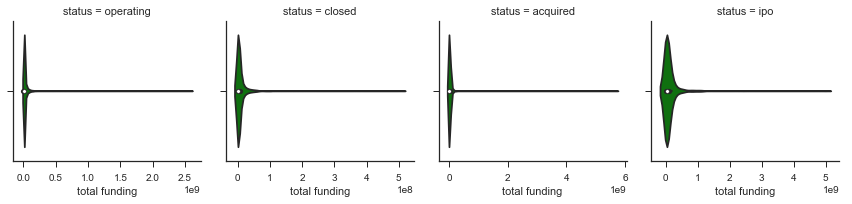

In [14]:
total_funding = companies['funding_total_usd']
status = companies['status']
funding_vs_status = {'total funding': total_funding, 'status': status}
fund_vs_status_df = pd.DataFrame(funding_vs_status)

sb.set(style="ticks", color_codes=True)
g = sb.FacetGrid(fund_vs_status_df, col="status", sharex = False)
g = g.map(sb.violinplot, "total funding", color = "green")

What is interesting here is that, while companies that closed have similar funding size distribution patterns compared to other companies, those that were acquired or got listed are notable for extreme outlier cases. We can have a look at some of those.

In [15]:
large_funding = companies['funding_total_usd'] > 100000000
companies[large_funding]["status"].value_counts()

operating    392
ipo          103
acquired      52
closed        14
Name: status, dtype: int64

In [16]:
#and in proportion form:
companies[large_funding]["status"].value_counts()/len(companies[large_funding])

operating    0.698752
ipo          0.183601
acquired     0.092692
closed       0.024955
Name: status, dtype: float64

These numbers show that for the subset of start-ups that received total funding over $100m, most companies ended up being listed (18.4%), with only 14 (2.5%) closing down. For comparison purposes, the proportion of closed companies in the entire dataset is 7.9% compared to 1.7% for listed companies. 

Let's check the other end of the spectrum and chek those companies that received no funding.

In [17]:
no_funding = companies.funding_total_usd.isnull()
companies[no_funding]["status"].value_counts()

operating    2737
closed        346
acquired      212
ipo            22
Name: status, dtype: int64

In [18]:
companies[no_funding]["status"].value_counts()/len(companies[no_funding])

operating    0.825143
closed       0.104311
acquired     0.063913
ipo          0.006632
Name: status, dtype: float64

Here, as expected, the effect is reversed: only 0.7% of companies with no prior funding got listed, while more than the average number of companies closed down (10.4%). The only problem to be aware of here -- NaN funding might not mean that the company had no funding whatsoever, it might also mean that we don't have enough information on the funding. So for now, we will avoid making any conclusions about 0 funding from the table.

#### What is the distribution of closed companies vs. operating companies by sector?

In [19]:
sector_status_acquired = companies[companies.status == 'acquired'].category_code.value_counts()
sector_status_operating = companies[companies.status == 'operating'].category_code.value_counts()
sector_status_closed = companies[companies.status == 'closed'].category_code.value_counts()
sector_status_ipo = companies[companies.status == 'ipo'].category_code.value_counts()

sector_status_dict = {'acquired': sector_status_acquired, 'operating': sector_status_operating, 'closed': sector_status_closed, 'ipo': sector_status_ipo}

sector_status_df = pd.DataFrame.from_dict(sector_status_dict)
sector_status_df = sector_status_df.fillna(value = 0)
sector_status_df['proportion_acq'] = sector_status_df['acquired']/(sector_status_df['acquired']+sector_status_df['closed']+sector_status_df['operating']+sector_status_df['ipo'])
sector_status_df['proportion_oper'] = sector_status_df['operating']/(sector_status_df['acquired']+sector_status_df['closed']+sector_status_df['operating']+sector_status_df['ipo'])
sector_status_df['proportion_ipo'] = sector_status_df['ipo']/(sector_status_df['acquired']+sector_status_df['closed']+sector_status_df['operating']+sector_status_df['ipo'])
sector_status_df['proportion_closed'] = sector_status_df['closed']/(sector_status_df['acquired']+sector_status_df['closed']+sector_status_df['operating']+sector_status_df['ipo'])


##### top sector for acquired companies

In [20]:
#top sector for acquired (by proportion)
sector_status_df[sector_status_df.proportion_acq == sector_status_df.proportion_acq.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
network_hosting,72.0,35.0,14.0,296,0.172662,0.709832,0.033573,0.083933


In [21]:
#and by the actual value
sector_status_df[sector_status_df.acquired == sector_status_df.acquired.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
software,384.0,272.0,36.0,3127,0.10055,0.818801,0.009427,0.071223


##### top sector for operating companies

In [22]:
#top sector for operating by proportion:
sector_status_df[sector_status_df.proportion_oper == sector_status_df.proportion_oper.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
government,0.0,0.0,0.0,11,0.0,1.0,0.0,0.0
local,0.0,0.0,0.0,43,0.0,1.0,0.0,0.0


In [23]:
#and by the actual value
sector_status_df[sector_status_df.operating == sector_status_df.operating.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
software,384.0,272.0,36.0,3127,0.10055,0.818801,0.009427,0.071223


##### top sector for listed companies

In [24]:
#top sector for operating by proportion:
sector_status_df[sector_status_df.proportion_ipo == sector_status_df.proportion_ipo.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
biotech,120.0,112.0,150.0,2360,0.043764,0.860686,0.054705,0.040846


In [25]:
#by actual value:
sector_status_df[sector_status_df.ipo == sector_status_df.ipo.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
biotech,120.0,112.0,150.0,2360,0.043764,0.860686,0.054705,0.040846


This fact actually confirms what I know about the space from my work -- you are expected to see more biotech and pharma IPO's than IPO's in any other sectors

##### top sector for closed companies

In [26]:
sector_status_df[sector_status_df.proportion_closed == sector_status_df.proportion_closed.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
public_relations,23.0,33.0,3.0,83,0.161972,0.584507,0.021127,0.232394


In [27]:
#by actual value: 
sector_status_df[sector_status_df.closed == sector_status_df.closed.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
web,215.0,353.0,18.0,1460,0.105083,0.713587,0.008798,0.172532


### Data wrangling

##### Dealing with duplicates

One of the big problems when dealing with human-generated data is human error. The existence of duplicates is one such area that must be accounted for when working with company datasets. To ensure that our dataset doesn't have any duplicates, we will rely on the fuzzywuzzy package, which uses Levenshtein Distance to spot potential duplicates.

In [28]:
from fuzzywuzzy import fuzz

C:\Users\Lana\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [29]:
company_name_list = companies.name

Let's check if any of the company names are duplicates.

In [30]:
company_name_list.duplicated().value_counts()

False    27326
True         1
Name: name, dtype: int64

Based on this, it seems that there is one company name that is a duplicate. Let's find out which one.

In [31]:
company_name_list[company_name_list.duplicated()]

16777    OneMln
Name: name, dtype: object

And here the lines which have the duplicate. Clearly, this is the same company, and all of the data for it is the same.

In [32]:
companies[companies.name == 'OneMln']

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,id
16776,/company/onemln,OneMln,http://www.smarttm.co,software,NaN,operating,POL,NaN,Torun,Torun,1,1/1/2012,2012-01,2012-Q1,2012.0,1/1/2013,1/1/2013,1/1/2012,16777
16777,/company/onemln,OneMln,http://www.smarttm.co,software,NaN,operating,POL,NaN,Torun,Torun,1,1/1/2012,2012-01,2012-Q1,2012.0,1/1/2013,1/1/2013,1/1/2012,16778


Let's delete this row and check for duplicates again

In [33]:
companies = companies[companies.id != 16777]
companies['permalink'].count()

27326

In [34]:
companies[companies.name == 'OneMln']

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,id
16777,/company/onemln,OneMln,http://www.smarttm.co,software,NaN,operating,POL,NaN,Torun,Torun,1,1/1/2012,2012-01,2012-Q1,2012.0,1/1/2013,1/1/2013,1/1/2012,16778


Whereas company duplicates that match 100% might be easy to spot, it becomes harder if there are typos in company names, so company names don't match 100%. At this point we will employ the fuzzywuzzy partial_ratio function to spot and map out potential duplicates.

In [35]:
def duplicate_cleanup(some_list):
    company_name_list =[]
    other_companies = []
    ratio =[]
    count = 0
    next_count = 0
    length = len(some_list)
    for count in range (count, length):
        count_entry = some_list[count]
        next_count = count + 1
        for next_count in range(next_count, length):
            next_count_entry = some_list[next_count]
            company_name_list.append(count_entry)
            other_companies.append(next_count_entry)
            ratio_companies = fuzz.partial_ratio(count_entry, next_count_entry)
            ratio.append(ratio_companies)
    final_dict = {'company names 1': company_name_list, 
                  'company names 2': other_companies,
                  'ratio': ratio}
    df = pd.DataFrame(final_dict)
    return df

The only problem is that, if we have 27326 companies on the list, the function will have to make 373 million comparisons. In this case, it becomes a big data problem, and there is not enough processing power to solve the problem locally. One way around it might be to split the list by letter and search for fuzzy duplicates within each letter. However, even that could not be done with the given resources. So going forward we will have to assume that there are no fuzzy duplicates on the list and will have to wait for a later opportunity to do a more precise analysis. 

Here is the code to do it letter by letter

In [36]:
list_of_duplicates_to_be_processed = companies.name.str.lower()

Here is an example of the code for letter 'a', commented out because it takes too long to run this cell (20 minutes)

In [37]:
#list_of_duplicates_to_process = list_of_duplicates_to_be_processed.str.startswith("a")
#list_to_pass_to_function = companies[list_of_duplicates_to_process].name
#list_to_pass_to_function = list_to_pass_to_function.reset_index(drop=True)
#ratios = duplicate_cleanup(list_to_pass_to_function)
#ratios[ratios.ratio > 90]

Letter "z" is a smaller subset, so here is an example of a few potential duplicates identified in the dataset

In [38]:
list_of_duplicates_to_process = list_of_duplicates_to_be_processed.str.startswith("z")
list_to_pass_to_function = companies[list_of_duplicates_to_process].name
list_to_pass_to_function = list_to_pass_to_function.reset_index(drop=True)
ratios = duplicate_cleanup(list_to_pass_to_function)
ratios[ratios.ratio > 90]

,company names 1,company names 2,ratio
10507,ZangZing,Zing,100
21049,Zazoo,Zazoom,100
32589,Zend Technologies,Zenda Technologies,94
32672,Zend Technologies,Ziften Technologies,91
37761,ZENT,ZENTICKET,100
46690,Zetta,ZettaCore,100
46691,Zetta,Zettaset,100
47314,Zettics,Zettics.,100
47315,Zettics,Zettics.com,100
47520,Zettics.,Zettics.com,100


Of these duplicates, Zettics looks especially suspicious. Let's take a closer look.

In [39]:
companies[companies.name.str.contains('Zettics')]

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,id
27119,/company/zettics,Zettics,http://zettics.com,software,8200000.0,operating,USA,NaN,SF Bay,Concord,1,1/1/2008,2008-01,2008-Q1,2008.0,7/24/2013,7/24/2013,1/1/2013,27120
27120,/company/zettics-3,Zettics.,http://www.zettics.com,mobile,7000000.0,operating,USA,WA,Seattle,Seattle,1,1/1/2008,2008-01,2008-Q1,2008.0,4/27/2010,4/27/2010,12/5/2012,27121
27121,/company/zettics-2,Zettics.com,http://www.zettics.com,analytics,8000000.0,operating,USA,NY,New York,New York,1,1/1/2009,2009-01,2009-Q1,2009.0,7/14/2011,7/14/2011,6/1/2009,27122


However, these three companies seem to be different just judging by the region, so we either need to manually investigate these duplicates further or leave everything as is for the time being.

##### Cleaning up dates

The final wrangling on the companies dataset I will do will be cleaning up the date type. I will then look for patterns around dates. 

In [40]:
#converting funded_at and first_funding_at columns from object to data type
companies['founded_at'] = pd.to_datetime(companies['founded_at'])
companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'])
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27326 entries, 0 to 27326
Data columns (total 19 columns):
permalink            27326 non-null object
name                 27326 non-null object
homepage_url         25939 non-null object
category_code        26297 non-null object
funding_total_usd    24010 non-null float64
status               27326 non-null object
country_code         25503 non-null object
state_code           16872 non-null object
region               27326 non-null object
city                 24704 non-null object
funding_rounds       27326 non-null int64
founded_at           21440 non-null datetime64[ns]
founded_month        21440 non-null object
founded_quarter      21440 non-null object
founded_year         21440 non-null float64
first_funding_at     27175 non-null datetime64[ns]
last_funding_at      27175 non-null object
last_milestone_at    14603 non-null object
id                   27326 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(13

### Some more data exploration

Let's try to understand if we can observe any difference between the various types of companies (i.e. successful or unsuccessful) based on how soon after getting founded they proceeded to get their first funding.

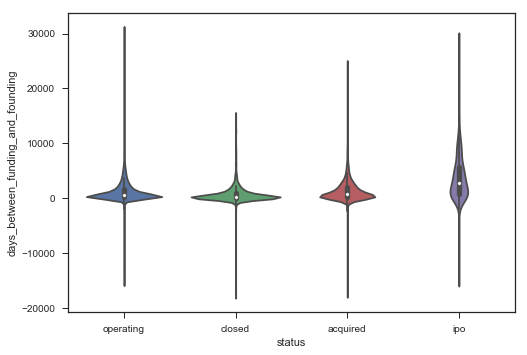

In [41]:
companies['days_between_funding_and_founding'] = companies['first_funding_at'] - companies['founded_at']
companies['days_between_funding_and_founding'] = companies['days_between_funding_and_founding']  / np.timedelta64(1,'D')

new_df = companies[['status','days_between_funding_and_founding']]

sb.violinplot(y="days_between_funding_and_founding", x = 'status', data=new_df)

C:\Users\Lana\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


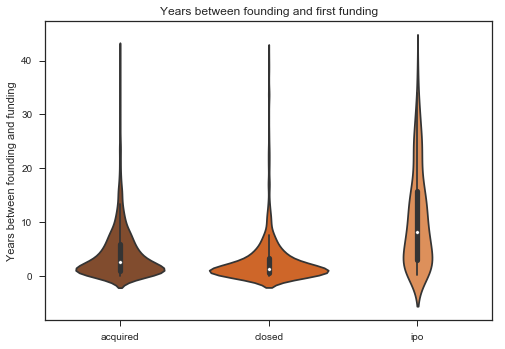

In [42]:
#let's remove companies with the negative difference -- that might be a mistake at the data aggregation stage
positive_values = new_df['days_between_funding_and_founding'] > 0
pos_val_new_df = new_df[positive_values]
#let's also limit to differences less than 15000 days to get a better visualization
no_outliers = pos_val_new_df['days_between_funding_and_founding'] < 15000
no_outliers_new_df = pos_val_new_df[no_outliers]

#Number of days is not too interpretable, so we'll convert to years
no_outliers_new_df['Years between founding and funding'] = no_outliers_new_df['days_between_funding_and_founding']/365
fig, ax = plt.subplots()

ax = sb.violinplot(y='Years between founding and funding', x = 'status', data=no_outliers_new_df[no_outliers_new_df.status != 'operating'], palette = 'Oranges_d')

ax.set_xlabel('')
ax.set_title('Years between founding and first funding')
plt.savefig('Years between founding and funding.png', bbox_inches='tight')

In [43]:
pos_val_new_df['Years between founding and funding'] = pos_val_new_df['days_between_funding_and_founding']/365
pos_val_new_df.groupby('status')['Years between founding and funding'].median()

C:\Users\Lana\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


status
acquired     2.523288
closed       1.287671
ipo          8.356164
operating    2.063014
Name: Years between founding and funding, dtype: float64

It's interesting that companies that closed down rushed to get the funding, waiting a little more than a year after getting founded. Taking operating companies as the 'average company', it's clear that 1.3 years is less time than an average company would take to get funding (2 years).

Let's look at averages as well to get the full picture. 

In [44]:
pos_val_new_df.groupby('status')['days_between_funding_and_founding'].mean()

status
acquired     1591.578670
closed       1027.338197
ipo          4132.484642
operating    1523.506126
Name: days_between_funding_and_founding, dtype: float64

#### Investments dataset

The second dataset that Crunchbase offers focuses on investments into start-ups, e.g. all the funding rounds that each start-up has received. Let's study that data set as well. 

In [45]:
investments = pd.read_csv('investments.csv')

C:\Users\Lana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
len(investments)

83893

In [47]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83893 entries, 0 to 83892
Data columns (total 21 columns):
company_permalink         83893 non-null object
company_name              83893 non-null object
company_category_code     82284 non-null object
company_country_code      80845 non-null object
company_state_code        59216 non-null object
company_region            83893 non-null object
company_city              78974 non-null object
investor_permalink        83893 non-null object
investor_name             83893 non-null object
investor_category_code    4465 non-null object
investor_country_code     63904 non-null object
investor_state_code       45503 non-null object
investor_region           83893 non-null object
investor_city             62653 non-null object
funding_round_type        83892 non-null object
funded_at                 83892 non-null object
funded_month              83892 non-null object
funded_quarter            83892 non-null object
funded_year               83

In [48]:
investments.head(3)

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
0,/company/tokita-investments,Tokita Investments,consulting,JPN,NaN,TBD,Okinawa Ken,/company/01startups,01Startups,NaN,...,NaN,unknown,NaN,angel,9/26/2013,2013-09,2013-Q3,2013.0,5000.0,1
1,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,ecommerce,...,NY,New York,New York,series-a,10/30/2012,2012-10,2012-Q4,2012.0,2000000.0,2
2,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/23/2012,2012-01,2012-Q1,2012.0,20000.0,3


In [49]:
#making sure that permalinks all translate into the same name between the two files.
investments[investments.company_name.str.contains('Zettics')]

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
24502,/company/zettics-3,Zettics.,mobile,USA,WA,Seattle,Seattle,/financial-organization/emergence-capital-part...,Emergence Capital Partners,NaN,...,CA,SF Bay,San Mateo,series-b,4/27/2010,2010-04,2010-Q2,2010.0,7000000.0,24503
24517,/company/zettics-2,Zettics.com,analytics,USA,NY,New York,New York,/financial-organization/emergence-capital-part...,Emergence Capital Partners,NaN,...,CA,SF Bay,San Mateo,venture,7/14/2011,2011-07,2011-Q3,2011.0,8000000.0,24518
24539,/company/zettics,Zettics,software,USA,NaN,SF Bay,Concord,/financial-organization/emergence-capital-part...,Emergence Capital Partners,NaN,...,CA,SF Bay,San Mateo,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,24540
47986,/company/zettics-2,Zettics.com,analytics,USA,NY,New York,New York,/financial-organization/north-bridge-venture-p...,North Bridge Venture Partners,NaN,...,MA,Boston,Waltham,venture,7/14/2011,2011-07,2011-Q3,2011.0,8000000.0,47987
48026,/company/zettics,Zettics,software,USA,NaN,SF Bay,Concord,/financial-organization/north-bridge-venture-p...,North Bridge Venture Partners,NaN,...,MA,Boston,Waltham,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,48027
49803,/company/zettics-3,Zettics.,mobile,USA,WA,Seattle,Seattle,/financial-organization/openair-ventures,OPENAIR Equity Partners,NaN,...,MO,Kansas City,Kansas City,series-b,4/27/2010,2010-04,2010-Q2,2010.0,7000000.0,49804
49804,/company/zettics-2,Zettics.com,analytics,USA,NY,New York,New York,/financial-organization/openair-ventures,OPENAIR Equity Partners,NaN,...,MO,Kansas City,Kansas City,venture,7/14/2011,2011-07,2011-Q3,2011.0,8000000.0,49805
60974,/company/zettics-3,Zettics.,mobile,USA,WA,Seattle,Seattle,/financial-organization/steamboat-ventures,Steamboat Ventures,NaN,...,CA,Los Angeles,Burbank,series-b,4/27/2010,2010-04,2010-Q2,2010.0,7000000.0,60975
60982,/company/zettics-2,Zettics.com,analytics,USA,NY,New York,New York,/financial-organization/steamboat-ventures,Steamboat Ventures,NaN,...,CA,Los Angeles,Burbank,venture,7/14/2011,2011-07,2011-Q3,2011.0,8000000.0,60983
60985,/company/zettics,Zettics,software,USA,NaN,SF Bay,Concord,/financial-organization/steamboat-ventures,Steamboat Ventures,NaN,...,CA,Los Angeles,Burbank,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,60986


While we should merge the two datasets on the investments.permalink = companies.company_permalink, we should keep in mind that certain duplicate columns might have to be deleted (name vs. company_name, category_code vs. company_category_code, country_code vs. company_country_code, state_code vs. company_state_code, region vs. company_region, city vs. company_city)

### Merging 2 datasets

In [50]:
#we will be merging both datasets on the permalink column
#we will do a left merge because we are only interested in companies that have a status, which is only available in the companies dataset
investments = investments.rename(columns = {'company_permalink': 'permalink'})
companies_investments = pd.merge(companies, investments, on = 'permalink')

len(companies_investments['permalink'])

66847

In [51]:
#dropping duplicate columns
companies_investments = companies_investments.drop(['name', 'category_code', 'country_code', 'state_code', 'region', 'city'], 1)

In [52]:
#checking at the row level to make sure merge was performed correctly.
companies_investments[companies_investments.company_name == 'Zettics']

,permalink,homepage_url,funding_total_usd,status,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id_y
66242,/company/zettics,http://zettics.com,8200000.0,operating,1,2008-01-01,2008-01,2008-Q1,2008.0,2013-07-24,...,CA,SF Bay,San Mateo,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,24540
66243,/company/zettics,http://zettics.com,8200000.0,operating,1,2008-01-01,2008-01,2008-Q1,2008.0,2013-07-24,...,MA,Boston,Waltham,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,48027
66244,/company/zettics,http://zettics.com,8200000.0,operating,1,2008-01-01,2008-01,2008-Q1,2008.0,2013-07-24,...,CA,Los Angeles,Burbank,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,60986
66245,/company/zettics,http://zettics.com,8200000.0,operating,1,2008-01-01,2008-01,2008-Q1,2008.0,2013-07-24,...,WA,Seattle,Seattle,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,68350


In [53]:
companies_investments[companies_investments.company_name == 'Zettics'].investor_name

66242       Emergence Capital Partners
66243    North Bridge Venture Partners
66244               Steamboat Ventures
66245                  Voyager Capital
Name: investor_name, dtype: object

##### Investors vs. company status

Let's see how different investors fare in terms of their companies succeeding. Because Series A funding round is riskier, those investors that enter early will inevitably have less information about the start-up than investors that enter in Series B, C, etc. Also, some investors will continue reinvesting in the company through all or some of the remaining funding rounds. Finally, some companies won't even go beyond Series A funding round, either succeeding or failing soon thereafter. Hence, Series A funding round is the most interesting to look at: we only have the original investors that invested early with the most risk involved. This is what we are going to consider right now.

In [54]:
#narrowing it down to Series A funding round
investor_vs_status = companies_investments[companies_investments.funding_round_type == 'series-a']
investor_vs_status = companies_investments[['investor_name','status']]
investor_vs_status = investor_vs_status.groupby('investor_name')['status'].value_counts()
investor_vs_status = investor_vs_status.unstack()
investor_vs_status = investor_vs_status.reset_index()

Let's see which investors have helped the most companies get listed

In [55]:
investor_vs_status.sort_values('ipo', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating
12190,Sequoia Capital,100.0,29.0,34.0,299.0
7699,Kleiner Perkins Caufield & Byers,63.0,12.0,26.0,278.0
9592,New Enterprise Associates,62.0,23.0,23.0,307.0
7645,Khosla Ventures,23.0,12.0,19.0,148.0
1622,Bessemer Venture Partners,38.0,3.0,17.0,173.0
3266,DAG Ventures,27.0,5.0,16.0,100.0
3879,Domain Associates,3.0,4.0,15.0,54.0
1563,Benchmark,55.0,3.0,14.0,175.0
6351,Intel Capital,88.0,32.0,14.0,311.0
249,Accel Partners,94.0,13.0,13.0,287.0


What about acquired companies?

In [56]:
investor_vs_status.sort_values('acquired', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating
12190,Sequoia Capital,100.0,29.0,34.0,299.0
249,Accel Partners,94.0,13.0,13.0,287.0
11842,SV Angel,93.0,10.0,7.0,277.0
6351,Intel Capital,88.0,32.0,14.0,311.0
3978,Draper Fisher Jurvetson (DFJ),69.0,26.0,10.0,285.0
7699,Kleiner Perkins Caufield & Byers,63.0,12.0,26.0,278.0
8818,Menlo Ventures,62.0,10.0,7.0,124.0
9592,New Enterprise Associates,62.0,23.0,23.0,307.0
14745,Y Combinator,58.0,44.0,NaN,283.0
4731,First Round Capital,56.0,13.0,2.0,223.0


And what about those closed companies?

In [57]:
investor_vs_status.sort_values('closed', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating
14745,Y Combinator,58.0,44.0,NaN,283.0
6351,Intel Capital,88.0,32.0,14.0,311.0
12190,Sequoia Capital,100.0,29.0,34.0,299.0
3978,Draper Fisher Jurvetson (DFJ),69.0,26.0,10.0,285.0
13277,Techstars,30.0,24.0,NaN,192.0
9592,New Enterprise Associates,62.0,23.0,23.0,307.0
9826,North Bridge Venture Partners,30.0,19.0,5.0,89.0
2632,Charles River Ventures,45.0,18.0,7.0,112.0
12755,Startupbootcamp,2.0,18.0,NaN,82.0
13978,US Venture Partners,45.0,18.0,4.0,136.0


Now let's look at proportions

In [58]:
investor_vs_status['proportion_ipo'] = investor_vs_status['ipo']/(investor_vs_status['ipo'] + investor_vs_status['operating'] + investor_vs_status['acquired'] + investor_vs_status['closed'])

investor_vs_status['proportion_acquired'] = investor_vs_status['acquired']/(investor_vs_status['ipo'] + investor_vs_status['operating'] + investor_vs_status['acquired'] + investor_vs_status['closed'])

investor_vs_status['proportion_closed'] = investor_vs_status['closed']/(investor_vs_status['ipo'] + investor_vs_status['operating'] + investor_vs_status['acquired'] + investor_vs_status['closed'])


IPO: 

In [59]:
investor_vs_status.sort_values('proportion_ipo', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating,proportion_ipo,proportion_acquired,proportion_closed
3694,Deerfield Capital Management,1.0,1.0,5.0,4.0,0.454545,0.090909,0.090909
6469,Iroquois Capital,2.0,1.0,5.0,5.0,0.384615,0.153846,0.076923
10437,Pegasus Capital,1.0,1.0,2.0,2.0,0.333333,0.166667,0.166667
5449,Great Point Partners,2.0,1.0,3.0,4.0,0.300000,0.200000,0.100000
2888,Clarus Ventures,10.0,1.0,10.0,13.0,0.294118,0.294118,0.029412
11733,SAIF Partners,2.0,1.0,10.0,21.0,0.294118,0.058824,0.029412
4495,European Founders Fund,2.0,3.0,5.0,9.0,0.263158,0.105263,0.157895
10902,Quaker BioVentures,1.0,5.0,6.0,11.0,0.260870,0.043478,0.217391
9268,Morgan Stanley,5.0,1.0,6.0,12.0,0.250000,0.208333,0.041667
6300,Innovatech Qu_bec,1.0,1.0,2.0,4.0,0.250000,0.125000,0.125000


Acquired:

In [60]:
investor_vs_status.sort_values('proportion_acquired', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating,proportion_ipo,proportion_acquired,proportion_closed
2051,Brian Pokorny,8.0,1.0,1.0,1.0,0.090909,0.727273,0.090909
9273,Morgan Stanley Venture Partners,6.0,1.0,1.0,3.0,0.090909,0.545455,0.090909
13966,UMC Capital,6.0,1.0,1.0,4.0,0.083333,0.500000,0.083333
12652,Sprout Group,6.0,1.0,1.0,4.0,0.083333,0.500000,0.083333
2967,Columbia Capital,27.0,3.0,1.0,26.0,0.017544,0.473684,0.052632
12280,Shea Ventures,9.0,1.0,1.0,8.0,0.052632,0.473684,0.052632
13558,Three Arch Partners,14.0,3.0,1.0,13.0,0.032258,0.451613,0.096774
1950,Brad Feld,4.0,1.0,1.0,3.0,0.111111,0.444444,0.111111
3982,Draper Richards,16.0,2.0,1.0,19.0,0.026316,0.421053,0.052632
394,Advent Venture Partners,13.0,1.0,1.0,16.0,0.032258,0.419355,0.032258


Closed: 

In [61]:
investor_vs_status.sort_values('proportion_closed', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating,proportion_ipo,proportion_acquired,proportion_closed
10926,Quester Capital,1.0,5.0,2.0,6.0,0.142857,0.071429,0.357143
13814,TransCosmos,1.0,6.0,2.0,10.0,0.105263,0.052632,0.315789
9375,NGEN Partners,1.0,7.0,1.0,16.0,0.040000,0.040000,0.280000
942,Anthem Capital Management,1.0,2.0,1.0,4.0,0.125000,0.125000,0.250000
711,American Capital,1.0,2.0,1.0,4.0,0.125000,0.125000,0.250000
14811,Yossi Vardi,3.0,3.0,1.0,6.0,0.076923,0.230769,0.230769
10902,Quaker BioVentures,1.0,5.0,6.0,11.0,0.260870,0.043478,0.217391
3125,Covera Ventures,8.0,4.0,1.0,7.0,0.050000,0.400000,0.200000
7906,Latterell Venture Partners,1.0,3.0,2.0,9.0,0.133333,0.066667,0.200000
9169,Mission Ventures,10.0,9.0,3.0,23.0,0.066667,0.222222,0.200000


My hypothesis is that the choice of an investor (which can be a proxy for the quality of the start-up or its management in some cases) does influence the success or failure of start-ups, along with the level and timing of funding. The data story does point out some differences in these factors for closed and acquired/listed companies. So in the capstone project I will attempt to predict the success of a start-up using all of these factors from these two datasets. There is one more dataset, acquisitions.csv, which is not as essential to the present analysis and which I won't explore today, but which might add further variables to our prediction model in the future.

### Inferential statistics
#### Testing the difference in means for average funding rounds between successful and unsuccessful companies

Now that we have a sense for the data and the dataset has more or less been cleaned up, it's time to test a few of our hypotheses.<br></br><br></br>The first hypothesis that we will test is whether there is a significant difference in the average funding round size for start-ups that were acquired and start-ups that closed and, similarly, between start-ups that got listed and start-ups that had to shut down.

To implement that, first we will create a column within the companies dataset for the average funding round size, by dividing total funding received by the total number of funding rounds.

In [62]:
companies['average_funding_round'] = companies['funding_total_usd']/companies['funding_rounds']

Then we have to separate average funding rounds for companies that closed from average funding rounds for companies that got acquired and for companies that got listed. We can also analyze the average number of funding rounds undergone by each type of start-up.

In [63]:
avg_funding_round_acquired = companies[companies.status == 'acquired'].average_funding_round.dropna()
avg_funding_round_closed = companies[companies.status == 'closed'].average_funding_round.dropna()
avg_funding_round_ipo = companies[companies.status == 'ipo'].average_funding_round.dropna()

In [64]:
num_of_funding_rounds = {'ipo': np.mean(companies[companies.status == 'ipo'].funding_rounds),
                        'acquired': np.mean(companies[companies.status == 'acquired'].funding_rounds),
                        'closed': np.mean(companies[companies.status == 'closed'].funding_rounds)}

In [65]:
num_of_funding_rounds

{'acquired': 1.9338235294117647,
 'closed': 1.3980492336274966,
 'ipo': 2.557894736842105}

Let's visualize the three average funding series in a boxplot.

In [66]:
df_avg_funding_round = pd.DataFrame({'ipo': avg_funding_round_ipo, 'acquired': avg_funding_round_acquired, 'closed': avg_funding_round_closed})

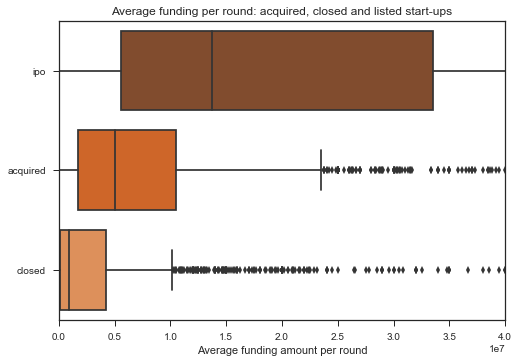

In [67]:
fig, ax = plt.subplots()
ax = sb.boxplot(data = df_avg_funding_round, orient = 'h', order = ['ipo', 'acquired', 'closed'], palette = 'Oranges_d')
ax.set_xlim(left = 0, right = 40000000)
ax.set_title('Average funding per round: acquired, closed and listed start-ups')
ax.set_xlabel('Average funding amount per round')
plt.savefig('Average funding.png', bbox_inches='tight')

To be able to test any hypothesis, we need to ascertain that some underlying assumptions are satisfied. First, we need to figure out if the sample is large enough. If so, to be able to assume that the sampling distribution of the sample proportion is approximately normal (based on the CLT theorem), we need to assure to the best of our ability that the data was sampled randomly and that each observation was sampled independently from the other observations. The main assumption that I will make with this dataset is that Crunchbase data is comprehensive, i.e. we are actually dealing with the entire population of start-ups at the given moment. We also probably don't have to worry about the independence of observations, given that, supposedly, funding rounds within one company should not influence the size of a funding round in another company.

However, to visualize the average funding distribution, let's plot the distribution of the average funding rounds.

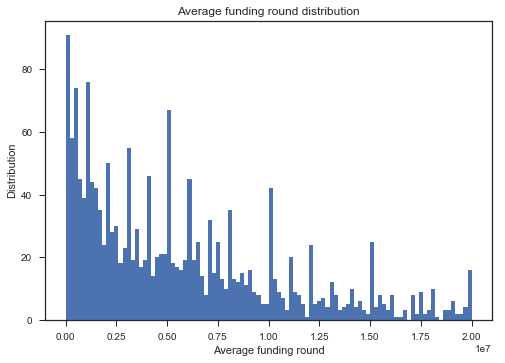

In [68]:
fig, ax = plt.subplots()

nbins = 100
xmin = 0
xmax = 20000000

ax = plt.hist(avg_funding_round_acquired, bins = nbins, range = [xmin, xmax])
plt.xlabel("Average funding round")
plt.ylabel("Distribution")
plt.title("Average funding round distribution")

In [69]:
print('Mean of the average funding round for acquired companies is: {:2f}'.format(np.mean(avg_funding_round_acquired)))
print('Standard deviation of the average funding round for acquired companies is: {:2f}'.format(np.std(avg_funding_round_acquired)))

Mean of the average funding round for acquired companies is: 10566621.570428
Standard deviation of the average funding round for acquired companies is: 37678829.603529


On average, each funding round for acquired companies was around USD 10.6m, with a standard deviation of USD 37.7m

What about listed companies?

In [70]:
print('Mean of the average funding round for acquired companies is: {:2f}'.format(np.mean(avg_funding_round_ipo)))
print('Standard deviation of the average funding round for acquired companies is: {:2f}'.format(np.std(avg_funding_round_ipo)))

Mean of the average funding round for acquired companies is: 45705770.382869
Standard deviation of the average funding round for acquired companies is: 124327935.569257


Listed companies seem to receive even more money per funding round, USD 45.7m. So what about closed companies?

In [71]:
print('Mean of the average funding round for acquired companies is: {:2f}'.format(np.mean(avg_funding_round_closed)))
print('Standard deviation of the average funding round for acquired companies is: {:2f}'.format(np.std(avg_funding_round_closed)))

Mean of the average funding round for acquired companies is: 4270461.191927
Standard deviation of the average funding round for acquired companies is: 11203593.007527


The average funding round seems to be much lower in this case. But is it significantly lower?

Before we test it, let's see how big our sample sizes are for each of the company types:

In [72]:
print('The sample size for closed companies is {:2f}'.format(len(avg_funding_round_closed)))
print('The sample size for acquired companies is {:2f}'.format(len(avg_funding_round_acquired)))
print('The sample size for listed companies is {:2f}'.format(len(avg_funding_round_ipo)))

The sample size for closed companies is 1807.000000
The sample size for acquired companies is 1964.000000
The sample size for listed companies is 453.000000


The samples sizes are sufficiently large, which should allow us to rely on the CLT theorem to assume that the sampling distribtion of the sample mean is approximately normally distributed.

We are ready to test the difference in means then. 

Ho: difference in an average funding round for acquired and closed companies = 0<br></br>
Ha: difference in an average funding round for aqcuired and closed companies is greater than or less than 0

In [73]:
import scipy.stats as stats
stats.ttest_ind(avg_funding_round_acquired, avg_funding_round_closed)

Ttest_indResult(statistic=6.8290439255951414, pvalue=9.9234542036418469e-12)

With a such a small p-value, we can reject the null hypothesis at the lowest, 1% significance level. This analysis seems to suggest that, on average, companies that will eventually close down receive less money from investors in each funding round, which is especially interesting given that the two sample sizes were approximately the same to begin with.

Now for comparison purposes let's test whether there is a significant diffence in the average size of funding rounds for listed and acquired companies. 

In [74]:
stats.ttest_ind(avg_funding_round_acquired, avg_funding_round_ipo)

Ttest_indResult(statistic=-10.588365809502781, pvalue=1.2195277964942263e-25)

In this case, the p-value is even smaller, which seems to imply that even for acquired and listed companies (i.e. the successful companies in our analysis) the difference in the average funding round size is significant. <br></br><br></br>At the same time, it is also important to understand the limitations of hypothesis testing, so, while it's an interesting result, it should only be used as an additional factor to consider as opposed to concrete evidence that the two types of start-ups are inherently different.

##### Looking only at successful vs. unsuccessful companies

Before we begin the modelling part, let's go back to the thesis of this project: we are looking to learn if we can predict company's success or failure through our available features. Of course, the biggest challenge of the project is the time component: at what point in company's development are we interested in such a prediction, i.e. at the point when a company is just founded, or when it got its first funding round, or when it received its last funding round? The problem is that the earlier we know the better, but, at the same time, we don't have enough information at that point to make a determination. Most of our available information is at Series A funding round. However, some of our features will be focused on the big-picture, such the total funding received.

Because we are only interested in successful vs. unsuccessful companies, we don't particularly care about companies that are still operating, so we will remove those from our dataframe.

In [75]:
companies_of_interest = companies_investments[companies_investments.status != 'operating']

### Clustering

Prior to model selection, we will do some clustering, to learn more about our data and to reduce dimensionality.<br></br><br></br>To accomplish that, let's create a pivot table from the merged companies + investments dataframe to generate one table of companies as rows vs. investors as columns. Each cell in the table will represent the number of funding rounds that a specific investor participated in for a given company. <br></br> <br></br>But to begin with, we will add an extra column of 1's to our dataframe companies_of_interest -- this will become our tally.

In [76]:
companies_of_interest['n']= 1
companies_pivoted = pd.pivot_table(companies_of_interest, values = 
                                         'n', index = 'permalink', columns = 'investor_name', aggfunc = np.count_nonzero, fill_value = 0)

C:\Users\Lana\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Let's double check that our code has worked. We will use Y Combinator as an example. 

In [77]:
print('Total number of funding rounds for Y Combinator: {:2f}'.format(companies_of_interest[companies_of_interest.investor_name == 'Y Combinator'].permalink.count()))

Total number of funding rounds for Y Combinator: 102.000000


Based on this we know that there should be 102 funding rounds combined for Y Combinator. Let's check what we have for the pivoted table.

In [78]:
sum = 0 
for x in range (1,10):
    sum = sum + x * np.sum(companies_pivoted['Y Combinator'] == x)
    
print(sum)

102


This quick check shows us that our transformation is working, we are indeed getting a table where the number for each row vs. column is either the total number of funding rounds that the investor participated in for this company or 0 if the investor wasn't involved with the company at all.

The best way to visualize our clustering will be through PCA. Reducing the dimensionality with PCA should also help us when we try different models on the data. In our current companies vs. investors dataframe we have more than 3500 rows and close to 4500 columns to process. If we can reduce the number of features, it will save us time and processing power later as well. 

So first, let's create a matrix out of our dataframe for clustering purposes:

In [79]:
x_cols = np.matrix(companies_pivoted)

We will now quickly visualize our matrix through PCA (looking at just the first two components during the visualization process).

In [80]:
import sklearn
from sklearn.decomposition import PCA
clusterer = PCA(n_components = 20)

In [81]:
X_new = clusterer.fit_transform(x_cols)

We'll also create a cluster ID column that will come in handy later as we try different clustering models. As mentioned before, we will first visualize our data with just the first two components  -- it's more interpretable that way.

In [82]:
companies_name = companies_of_interest.permalink.unique()

In [83]:
df_PCA = pd.DataFrame({'company_name': companies_name,'X': X_new[:,0], 'Y': X_new[:,1], 'cluster ID': 1})
df_PCA.head(2)

,X,Y,cluster ID,company_name
0,0.083000,-0.149368,1,/company/fox-networks
1,0.020408,-0.075580,1,/company/waywire


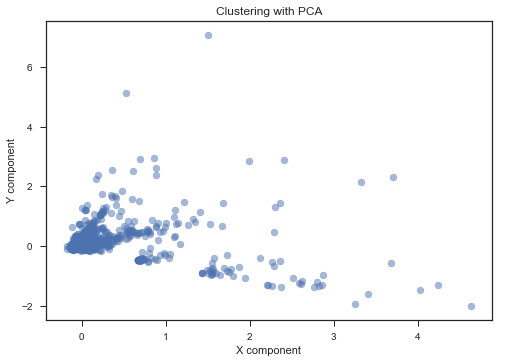

In [84]:
fig, ax = plt.subplots()

ax.scatter(df_PCA.X, df_PCA.Y, alpha=0.5)
plt.xlabel("X component")
plt.ylabel("Y component")
plt.title("Clustering with PCA")

The scatter plot has an interesting V shape, which is hard to interpret at the moment, but which might point to a substantial skew in the data, which means that it might be wise to log-transform our data first. 

In [85]:
x_cols = np.log(x_cols + 1)

In [86]:
X_new = clusterer.fit_transform(x_cols)

In [87]:
df_PCA = pd.DataFrame({'company_name': companies_name,'X': X_new[:,0], 'Y': X_new[:,1], 'cluster ID': 1})
df_PCA.head(2)

,X,Y,cluster ID,company_name
0,0.242176,-0.386312,1,/company/fox-networks
1,0.084677,-0.095070,1,/company/waywire


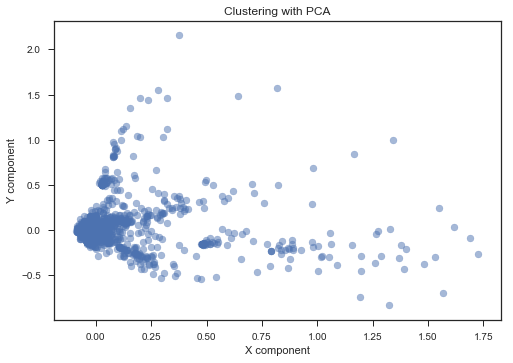

In [88]:
fig, ax = plt.subplots()

ax.scatter(df_PCA.X, df_PCA.Y, alpha=0.5)
plt.xlabel("X component")
plt.ylabel("Y component")
plt.title("Clustering with PCA")

I am curious to know what the cumulative explained variance for our model is.

In [89]:
print('Cumulative explained variance for the PCA model with 20 components is: {:2f}'.format(np.cumsum(clusterer.explained_variance_ratio_)[19]))

Cumulative explained variance for the PCA model with 20 components is: 0.142260


The 14.2% explained total variance is not very high, so let's try different number of components to see how we can improve the PCA.

In [90]:
range_values = [500,750, 1000, 1250, 1500]
i = 2
best_var = 0 
array_var = []
for i in range_values:
    clusterer = PCA(n_components = i)
    X_new = clusterer.fit_transform(x_cols)
    exp_var = np.cumsum(clusterer.explained_variance_ratio_)[i-1]
    array_var.append(exp_var)

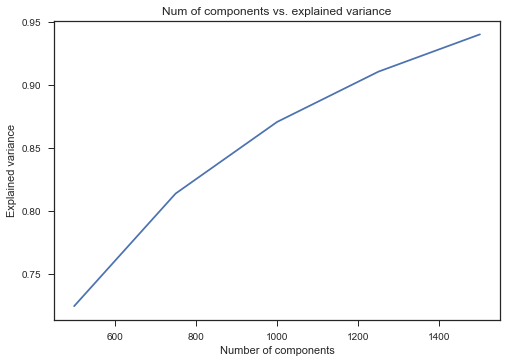

In [91]:
fig, ax = plt.subplots()

ax.plot(range_values, array_var)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Num of components vs. explained variance")

Since we are looking to capture at least 70%-80% of the variance, ~600 components should be good for our analysis. In this case, we will be capturing the following percentage of the total variance:

In [92]:
clusterer = PCA(n_components = 600)
X_new = clusterer.fit_transform(x_cols)
exp_var = np.cumsum(clusterer.explained_variance_ratio_)[599]
exp_var

0.7661083392683582

Having reduced the dimensions to 600 columns, we can now apply kmeans clustering.

But first, we need to find the optimal number of clusters for our data, which we will do based on the silhouette score. We will try 2-7 clusters for our analysis.

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [94]:
range_values = [2,3,4,5,6,7]
i = 2
best_sil_score = 0 
for i in range_values:
    clusterer_kmeans = KMeans(n_clusters = i, random_state = 10)
    x_kmeans = clusterer_kmeans.fit_transform(X_new)
    predicted_labels = clusterer_kmeans.predict(X_new)
    sil_score = silhouette_score(X_new, predicted_labels)
    if i == 3:
        sil_score_3 = sil_score
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_num_clusters = i

In [95]:
print('The optimal number of clusters is {:2f}'.format(best_num_clusters))
print('The corresponding silhouette score is {:2f}'.format(best_sil_score))

The optimal number of clusters is 2.000000
The corresponding silhouette score is 0.318888


Thanks to reduced dimensions, our kmeans clustering analysis ran much quicker. Doing it without PCA first would have required much more time.

Now we know that the optimal number of clusters is 3. Let's explore and visualize those clusters.

In [96]:
clusterer_kmeans = KMeans(n_clusters = 3)
x_kmeans = clusterer_kmeans.fit_transform(X_new)
array_labels = clusterer_kmeans.labels_

In [97]:
len(array_labels)

3527

In [98]:
df_kmeans_for_viz = pd.DataFrame({'company_name': companies_name,'X': X_new[:,0], 'Y': X_new[:,1], 'cluster ID': array_labels})
df_kmeans_for_viz.head(2)

,X,Y,cluster ID,company_name
0,0.242174,-0.386262,0,/company/fox-networks
1,0.084674,-0.094929,0,/company/waywire


We will visualize our clusters, again using just the first two components, X and Y:

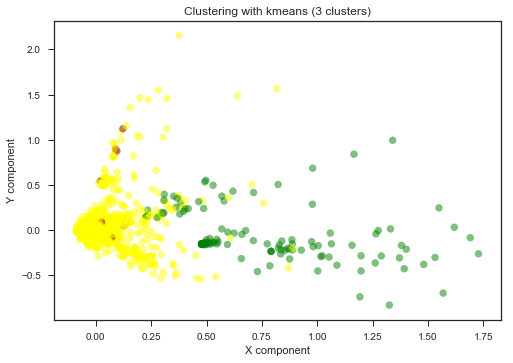

In [99]:
col = {0:'yellow', 1:'maroon', 2:'green'}

cluster_col = df_kmeans_for_viz['cluster ID']

fig, ax = plt.subplots()

ax.scatter(df_kmeans_for_viz.X, df_kmeans_for_viz.Y, c=cluster_col.apply(lambda x: col[x]), alpha = 0.5)
plt.xlabel("X component")
plt.ylabel("Y component")
plt.title("Clustering with kmeans (3 clusters)")

plt.savefig('Clustered.png', bbox_inches='tight')

An interesting pattern emerges when looking at the chart this way. However, we have to remember that we are looking at just the first two components out of 600 possible components. It is too difficult to interpret the clusters in the current situation. Some further exploration might reveal the following:

In [100]:
df_components = pd.DataFrame(X_new)
df_components['clusters'] = array_labels
df_components['permalink'] = companies_name

In [101]:
df_clustered = df_components.merge(companies_of_interest)
df_clustered.head(10)

,0,1,2,3,4,5,6,7,8,9,...,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id_y,n
0,0.242174,-0.386262,0.507051,-0.426760,-0.129286,-0.106019,0.173786,-0.365941,0.386647,0.153517,...,United Kingdom - Other,NaN,venture,1/16/2007,2007-01,2007-Q1,2007.0,4912394.0,27550,1
1,0.084674,-0.094929,0.135520,-0.076579,-0.032685,-0.036322,0.070389,0.064017,0.043985,-0.065816,...,SF Bay,San Francisco,series-a,6/30/2012,2012-06,2012-Q2,2012.0,1750000.0,26643,1
2,0.084674,-0.094929,0.135520,-0.076579,-0.032685,-0.036322,0.070389,0.064017,0.043985,-0.065816,...,SF Bay,Palo Alto,series-a,6/30/2012,2012-06,2012-Q2,2012.0,1750000.0,35830,1
3,0.084674,-0.094929,0.135520,-0.076579,-0.032685,-0.036322,0.070389,0.064017,0.043985,-0.065816,...,unknown,NaN,series-a,6/30/2012,2012-06,2012-Q2,2012.0,1750000.0,76118,1
4,0.084674,-0.094929,0.135520,-0.076579,-0.032685,-0.036322,0.070389,0.064017,0.043985,-0.065816,...,unknown,NaN,series-a,6/30/2012,2012-06,2012-Q2,2012.0,1750000.0,79822,1
5,0.084674,-0.094929,0.135520,-0.076579,-0.032685,-0.036322,0.070389,0.064017,0.043985,-0.065816,...,unknown,NaN,series-a,6/30/2012,2012-06,2012-Q2,2012.0,1750000.0,83304,1
6,-0.060065,-0.026364,-0.035254,0.008618,0.002679,-0.018481,-0.001709,-0.013150,-0.017285,0.004529,...,SF Bay,Mountain View,angel,1/1/2010,2010-01,2010-Q1,2010.0,15000.0,6074,1
7,-0.060065,-0.026364,-0.035254,0.008618,0.002679,-0.018481,-0.001709,-0.013150,-0.017285,0.004529,...,SF Bay,Palo Alto,series-a,2/16/2011,2011-02,2011-Q1,2011.0,2520000.0,25763,1
8,-0.060065,-0.026364,-0.035254,0.008618,0.002679,-0.018481,-0.001709,-0.013150,-0.017285,0.004529,...,SF Bay,Palo Alto,series-a,2/16/2011,2011-02,2011-Q1,2011.0,2520000.0,27087,1
9,-0.060065,-0.026364,-0.035254,0.008618,0.002679,-0.018481,-0.001709,-0.013150,-0.017285,0.004529,...,New York,New York,angel,1/1/2010,2010-01,2010-Q1,2010.0,15000.0,27980,1


In [102]:
df_clustered['average_funding_round'] = df_clustered['funding_total_usd']/df_clustered['funding_rounds']

In [103]:
cluster_1_df = df_clustered[df_clustered['clusters'] == 0]

In [104]:
cluster_2_df = df_clustered[df_clustered['clusters'] == 1]

In [105]:
print('The average funding per round raised for cluster 1 start-ups: {:2f}'.format(np.mean(cluster_1_df.average_funding_round)))
print('The average funding per round raised for cluster 2 start-ups: {:2f}'.format(np.mean(cluster_2_df.average_funding_round)))

The average funding per round raised for cluster 1 start-ups: 14961733.342304
The average funding per round raised for cluster 2 start-ups: 24245391.262621


In [106]:
print('The average number of funding rounds for cluster 1 start-ups: {:2f}'.format(np.mean(cluster_1_df.funding_rounds)))
print('The average number of funding rounds for cluster 2 start-ups: {:2f}'.format(np.mean(cluster_2_df.funding_rounds)))

The average number of funding rounds for cluster 1 start-ups: 2.853810
The average number of funding rounds for cluster 2 start-ups: 2.528846


What is also interesting is grouping the companies in the clusters by status.

In [107]:
identifying_status_by_cluster_df = df_clustered.loc[:,['permalink','status','clusters']]
identifying_status_by_cluster_df = identifying_status_by_cluster_df.drop_duplicates()

#focusing only on the status and cluster ID columns
identifying_status_by_cluster_df = identifying_status_by_cluster_df.loc[:,['status', 'clusters']]

#for the first cluster:
cluster_1_status_df = identifying_status_by_cluster_df[identifying_status_by_cluster_df['clusters'] == 0]

print('Cluster 1')
cluster_1_status_df.groupby('status').count()


Cluster 1


,clusters
status,
acquired,1838
closed,1283
ipo,259


In [108]:
cluster_2_status_df = identifying_status_by_cluster_df[identifying_status_by_cluster_df['clusters'] == 1]
print('Cluster 2')
cluster_2_status_df.groupby('status').count()

Cluster 2


,clusters
status,
acquired,11
closed,11
ipo,4


There does not seem to be much meaning on the status-level, however. What is worth noting here is that the second cluster is much smaller than the first, which does not explain much, unfortunately.

### <i> Clustering: summary </i>

Clustering analysis of start-ups vs. investors with kmeans (3 clusters) yielded little in this case. The silhouette score of 0.3 suggests that the structure is weak and could be artificial. While there was some difference between the two clusters around average number of funding rounds and total funding raised, this particular clustering analysis (of positioning start-up data with investor data) provided no insight into whether successful start-ups are different from non-successful start-ups at an investor level.<br></br><br></br>In the future, it will be worth trying different clustering methods and not just focusing on kmeans. Also, analyzing investors (based on companies invested into), i.e. the reverse of the current matrix structure, might be interesting as well.<br></br><br></br>Even though clustering results might not have yielded much, it was still an important step towards the prediction part. Transforming investor data into a format more appropriate for processing and reducing dimensionality will prove useful below.

### Determining the best prediction model to identify start-up success

Having cleaned the data and having gained insight into the structure of the data and some of the patterns behind it, we have now reached the most important stage of the project: using machine-learning to be able to predict start-up success given observed information.

But first, let's look at our start-up data once again, to keep only those columns that we will need for our analysis. The newly created df_clustered dataframe with the 600 components is too big, so we will look at the companies_investments columns to decide what else needs to be modified.

In [109]:
companies_investments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66847 entries, 0 to 66846
Data columns (total 34 columns):
permalink                            66847 non-null object
homepage_url                         64803 non-null object
funding_total_usd                    62534 non-null float64
status                               66847 non-null object
funding_rounds                       66847 non-null int64
founded_at                           57262 non-null datetime64[ns]
founded_month                        57262 non-null object
founded_quarter                      57262 non-null object
founded_year                         57262 non-null float64
first_funding_at                     66847 non-null datetime64[ns]
last_funding_at                      66847 non-null object
last_milestone_at                    49668 non-null object
id_x                                 66847 non-null int64
days_between_funding_and_founding    57262 non-null float64
company_name                         66847 non-n

Of this information, permalink, homepage_url, founded_quarter, id_x, last_milestone_at, investor_permailnk, funded_quarter, id_y, and n are not particularly informative factors, they do not represent an intrinsic feature of a specific company, so we will remove them from the dataframe.

Also, instead of the first_funding_at, we'll just keep the days_between_funding_and_founding, to make our dataframe time-agnostic.

In [110]:
df_ready_for_model = df_clustered.drop(['permalink', 'homepage_url', 'id_x', 'founded_at', 'founded_month', 'founded_quarter', 'first_funding_at', 'last_funding_at', 'last_milestone_at', 'investor_permalink', 'funded_quarter','id_y', 'n'],1)

As mentioned earlier, for this specific project I will only focus on the Series A funding round and will ignore information about further funding rounds. Also, we have already transformed our investor data into data that can be processed by our model, so we will remove investor information from the dataframe used in our model.

In [111]:
df_ready_for_model = df_ready_for_model.drop(['investor_name', 'investor_category_code', 'investor_country_code', 'investor_state_code', 'investor_region', 'investor_city', 'funding_round_type', 'funded_at', 'funded_month', 'funded_year', 'raised_amount_usd'],1)

Now that we have removed all of the extraneous columns, what information do we have left? First, we have information about the start-up itself (sector, geography). We also have information about its investors, as transformed through PCA previously. Finally, we have information about the total amount that the company raised and the time lapse between founding date and first funding round. 

Since the merged file has more than one line per company, corresponding to each investor per each funding round per each start-up, we will have to drill down to have only one start-up per row. 

In [112]:
df_ready_for_model = df_ready_for_model.drop_duplicates()

In [113]:
len(df_ready_for_model)

3527

It's the same number of companies as we had in our matrix for clustering, so I know that all of the clean-ups were done correctly.

Now we will classify our companies in the dataframe as either successful or not based on their status: 0 will refer to closed or unsuccessful companies, while 1 will refer to companies that were acquired or got listed, i.e. successful companies.

In [114]:
df_ready_for_model = df_ready_for_model.reset_index()
array_of_success = []

num_of_rows = len(df_ready_for_model)
i=0

for i in range(0, num_of_rows):
    if df_ready_for_model.status[i] == 'closed':
        array_of_success.append(0)
    elif df_ready_for_model.status[i] == 'ipo' or df_ready_for_model.status[i] == 'acquired':
        array_of_success.append(1)

In [115]:
df_ready_for_model['success'] = array_of_success

In [116]:
#we can delete the status column now
df_ready_for_model = df_ready_for_model.drop(['status'],1)

The very last thing that we will have to do before we apply different models to our data is convert any categorical variables into dummy variables, because logistic regression, for example, does not accept any categorical variables as features.

What are the categorical variables that we have? They are company_category_code, company_country_code, company_state_code, company_region, and company_city.

In [117]:
company_names_to_store = df_ready_for_model.company_name

In [118]:
df_ready_for_model = df_ready_for_model.drop('company_name',1)

In [119]:
df_final = pd.get_dummies(df_ready_for_model, columns = ['company_category_code', 'company_country_code','company_state_code',
                                              'company_region', 'company_city'], prefix = ['company_category_code', 
                                              'company_country_code','company_state_code', 'company_region', 'company_city'])

There are three more columns that we might need to modify to enable modelling: funding_total_usd, funding_rounds, days_between_funding_and_founding, founded_year, and average_funding_round. What we need to do here is take care of NaN's, which won't allow us to run our model. We will substitute NaN's with the mean value for that column, but other ways, such as median or conditional mean, might be considered as well.

In [120]:
df_final.funding_total_usd.fillna((df_final.funding_total_usd.mean()), inplace = True)
df_final.funding_rounds.fillna((df_final.funding_rounds.mean()), inplace = True)
df_final.days_between_funding_and_founding.fillna((df_final.days_between_funding_and_founding.mean()), inplace = True)
df_final.founded_year.fillna((df_final.founded_year.mean()), inplace = True)
df_final.average_funding_round.fillna((df_final.average_funding_round.mean()), inplace = True)

And now our dataframe is fully ready for further analysis.

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

The next step will be breaking down our dataframe into training/cross-validation, validation, and prediction subsets. We will use the first subset to train our data and find the best hyperparameters, the second subset (the validation one) will be used to find the best-performing model for our analysis, and the last subset -- to predict and analyze results. Before that last step we will use the combined first and second subset to train the data before the final testing. 

Our features will be stored in a dataframe X and the labels will be stored in an array named y.

In [122]:
y = df_final.success
X = df_final.drop(['success'], 1)

Let's split the data into "training" and testing first, putting 70% of the data in training and 30% of the data in testing. We will then split the "training" set into two more subsets, training and validation, with 40% of the original data going into training and 30% of the original data going into validation.

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_intermediate, X_test, y_intermediate, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [125]:
X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate, y_intermediate, test_size = 0.3, random_state = 10)

In [126]:
print('We have {:2f}'.format(len(X_train)) + ' entries in the training set, {:2f}'.format(len(X_validation)) + ' entries in the validation set, and {:2f}'.format(len(X_test)) + ' rows in the testing set')

We have 1727.000000 entries in the training set, 741.000000 entries in the validation set, and 1059.000000 rows in the testing set


Because our dependent variable is binary, linear regression would not be best and the most interpretable option. Instead, I will use Logistic Regression and Random Forest to develop a predictive mechanism.

#### Cross-validation

For logistic regression, the hyperparameter that we need to determine is regularization parameter C.

In [127]:
#the grid of parameters to test:

Cs = [0.0000001, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 100]

We will use GridSearchCV to perform cross-validation.

In [128]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': Cs}
lr = LogisticRegression()
clf_train_lr = GridSearchCV(lr, parameters)
clf_train_lr.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-07, 1e-05, 0.0001, 0.001, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [129]:
clf_train_lr.best_params_

{'C': 1e-07}

For the Random Forest model I will tune the n_estimators parameter, although it is also possible to tune max_features and max_depth, in addition to a few other parameters.

In [130]:
parameters_RF = {'n_estimators': [100,200]}
rf = RandomForestClassifier(random_state = 10)
clf_train_rf = GridSearchCV(rf, parameters_RF)
clf_train_rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=10,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [131]:
clf_train_rf.best_params_

{'n_estimators': 100}

This was to be expected -- the more estimators there are, the better the model should do. We could have skipped this step, but it was useful for demonstration purposes nonetheless.

#### Validation

Now let's test our data on the validation subset and see which model does best.

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
score_lr = accuracy_score(y_validation, clf_train_lr.predict(X_validation))

In [134]:
score_rf = accuracy_score(y_validation, clf_train_rf.predict(X_validation))

In [135]:
print("The accuracy score for logistic regression is {:2f}".format(score_lr))
print("The accuracy score for random forest is {:2f}".format(score_rf))

The accuracy score for logistic regression is 0.593792
The accuracy score for random forest is 0.630229


Let's compare is to the baseline, which is the percentage of 1's in our y_validation array

In [136]:
print("There are {:2f}".format((y_validation == 1).sum()) + " entries out of {:2f}".format(len(y_validation)) + " entries that are successful")

There are 440.000000 entries out of 741.000000 entries that are successful


In [137]:
print("The baseline is {:2f}".format(440/741))

The baseline is 0.593792


This means that our logistic regression is right at the baseline, while Random Forest is doing a better job predicting the right outcome.

Let's look at other measures to determine how good our models are, in particular the Random Forest model:

Confusion matrix for logistic regression:

In [138]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_validation, clf_train_lr.predict(X_validation))

In [139]:
cm_lr

array([[  0, 301],
       [  0, 440]])

Basically, logistic regression is only predicting 1's and no 0's. It is definitely not a good fit for our analysis.

We can also do a classification report on the logistic model. 

In [140]:
from sklearn.metrics import classification_report
print("Classification report for the logistic model")
print(classification_report(y_validation, clf_train_lr.predict(X_validation), target_names=['unsuccessful', 'successful']))

Classification report for the logistic model
              precision    recall  f1-score   support

unsuccessful       0.00      0.00      0.00       301
  successful       0.59      1.00      0.75       440

 avg / total       0.35      0.59      0.44       741



C:\Users\Lana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Let's consider confusion matrix for the Random Forest now.

In [141]:
cm_rf = confusion_matrix(y_validation, clf_train_rf.predict(X_validation))
TP = cm_rf[0][0]
FN = cm_rf[0][1]
FP = cm_rf[1][0]
TN = cm_rf[1][1]
print("Confusion matrix for Random Forest")
cm_rf

Confusion matrix for Random Forest


array([[ 73, 228],
       [ 46, 394]])

In [142]:
print("Specificity for the Random Forest model is {:2f}".format(TP/(TP+FN)))
print("Sensitivity for the Random Forest model is {:2f}".format(TN/(FP+TN)))

Specificity for the Random Forest model is 0.242525
Sensitivity for the Random Forest model is 0.895455


In [143]:
print("Classification report for Random Forest")
print(classification_report(y_validation, clf_train_rf.predict(X_validation), target_names=['unsuccessful', 'successful']))

Classification report for Random Forest
              precision    recall  f1-score   support

unsuccessful       0.61      0.24      0.35       301
  successful       0.63      0.90      0.74       440

 avg / total       0.63      0.63      0.58       741



#### Training

In [144]:
rf = RandomForestClassifier(n_estimators = 200, random_state = 10)
clf_final_training_rf = rf.fit(X_intermediate, y_intermediate)

The full training on the combined new training data (cross-validation + validation) using RF is done, so let's test it on the final testing set:

#### Testing

In [145]:
score_rf_final_testing = accuracy_score(clf_final_training_rf.predict(X_test), y_test)

In [146]:
print("The accuracy score for the testing set is {:2f}".format(score_rf_final_testing))

The accuracy score for the testing set is 0.671388


In [147]:
print("Baseline: {:2f}".format((y_test == 1).sum()/(len(y_test))))

Baseline: 0.631728


This is interesting, because even though the difference is not large, RF still manages to outperform baseline on the data that the model has never seen before.

Let's create a classification report to analyze full results:

In [148]:
print(classification_report(y_test, clf_final_training_rf.predict(X_test), target_names=['unsuccessful', 'successful']))

              precision    recall  f1-score   support

unsuccessful       0.63      0.26      0.37       390
  successful       0.68      0.91      0.78       669

 avg / total       0.66      0.67      0.63      1059



Even though our model could not achieve at least 70% accuracy, it still performs better than the baseline, even if marginally so. There is a lot we can improve in the future, which I will touch upon in my recommendations and suggestions for further research.

### Recommendations

1. For investors looking to invest in a start-up, this model can be used as early as Series A funding round to identify potential successful and unsuccessful candidates. At the same time, the model uses total amount of funding and total number of funding rounds -- elements that can only be observed at the end of a start-up cycle -- as its features. Hence, the more funding rounds a company has gone through, the more information we have for the model, which should in theory improve the prediction for that specific start-up.<br></br><br></br>
2. At a more granular level, investors are encouraged to consider individual features, such as days/years before the company got its first funding, selection of investors in each round, or average amount of funding per round, to raise concerns about a potential investment. For example, the study showed that, on average, start-ups wait 1500 days before getting their first round. Unsuccessful companies, on the other hand, wait on average only about 1000 days before the first round. While this criterion should be used carefully to judge any future performance, it may serve as a red flag when looking at a potential investment.<br></br><br></br>
3. Finally, while the model showed improved performance over a baseline model, the number of features used in the model was limited by available data. Hence, it would be ideal to invest into acquisition of further start-up data, e.g. information on founders (age, education, number of successful start-ups created prior to this start-up), start-up financial information, PR and marketing information (i.e. number of times the company was  mentioned in the news in the first year), etc. This information will not only shed some more light on what defines start-up success, but may also lead to more accurate prediction at Series A funding round.


#### Suggestions for further research and improvements to the current study

Our model did slightly better than the baseline, but it was still below the accepted accuracy of 70%. Hence, there is a lot of work ahead to improve the model. Here just a few suggestions for improvement:

<b>Features:</b>

a. The study was based on Crunchbase data downloaded in 2015, which means that some of this information might be outdated. Working with the most recent dataset is the first improvement that can be done for this study. Ideally, such model should be trained in real-time, given that Crunchbase is a dynamic database.<br></br><br></br>
b. The next step would be to utilize the acquisitions dataset to add more features to the model. This is an improvement that can easily be implemented even with the current resources.<br></br><br></br>
c. As mentioned in the recommendation section above, a more expensive improvement would be to acquire additional data pertaining to start-ups. Scraping websites such techcrunch for certain PR information, such as the number of time a company was mentioned in the new, is one possibility. Potentially looking to acquire data on founders or private financial information for each start-up would be another possibility. These should theoretically improve the performance of the model. 

When it comes to features, we want to make sure that those additional variables pertain to the early stages of company development, so that we could predict start-up success at Series A funding round at the latest. 

<b>Model:</b><br></br>

The model itself is quite basic at the moment. We only considered Logistic Regression and Random Forest as potential models. However, other models could be considered as well. Support Vector Machines, other binary classifiers, or a combination of different models might ultimately yield better results.<br></br>

In addition, we can also venture beyond predicting successful vs. unsuccessful outcome but can attempt to predict whether a company will end up getting listed or will get acquired. The latter information might be especially interesting and actionable for the advisory community or potential bidders.<br></br><br></br>

What is important to remember is that this study was intended to start the conversation on applying machine-learning to start-up succes -- there is plenty of opportunity to build on the insights -- as well as the limitations -- of the current study.


